### Blog Post: Classifying Palmer Penguins

In this blog post, I aim to gain familiarity with pandas tools used for machine learning. I will be exploring a data set about penguins, and attempting to classify them by species based on individual quantitative and qualitative attributes. First, I will take a look at the data and clean it so that it is ready for use. Then I will get familiar with the data through graphical representations, in an effort to make the best decision about which features to use in modelling. Using a reproducible process, I will determine which 3 attributes (1 qualitative and 2 quantitative) should be used for the model. Cross-validation on the training data will be tested with several different models to determine the best model before moving on to the test data. Once the best model is determined, it will be run on the test data, with a goal of 100% accuracy of classification. To analyze the work, I will plot the species regions for both test and training data, and look at a confusion matrix before summing up my findings.

Before beginning analysis, the training data must be accessed.

In [1]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Below is a sample of what it looks like:

In [2]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Clearly, this is a LOT of data. Furthermore, not all of it is super useful. For example, the studyName and Sample Number columns aren't meaningful to this analysis. Some other columns, like Sex and Island need to be reformatted to allow for analysis. Now, I will clean the data.

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.fit_transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


### Explore

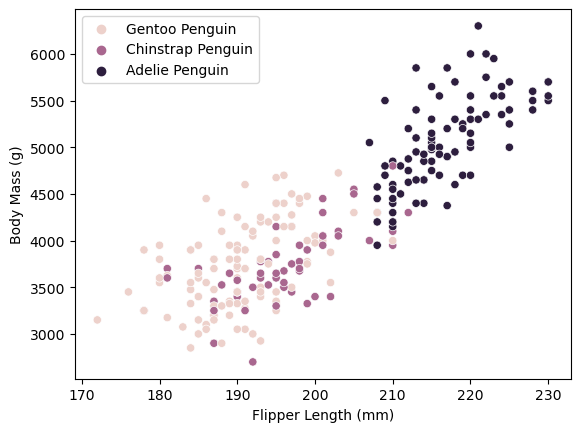

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

x = X_train['Flipper Length (mm)']
y = X_train['Body Mass (g)']

ax = sns.scatterplot(data = X_train, x = 'Flipper Length (mm)', y = 'Body Mass (g)', hue = y_train)

h,l = ax.get_legend_handles_labels()

l = ["Gentoo Penguin", "Chinstrap Penguin", "Adelie Penguin"]

ax.legend(h, l)
plt.show()

To be honest, I started out with some quantitative attributes that seemed interesting. Tossing them onto a graph organized by species seems to be a good way to get a feel of whether they could successfully be used as classifiers. While the combination of body mass and flipper length looks like it may be able to identify (2) penguins, it would be extremely difficult to differentiate penguins of species (0) and (1). Thus, I determined I should continue searching for more ideal attributes prior to modeling.

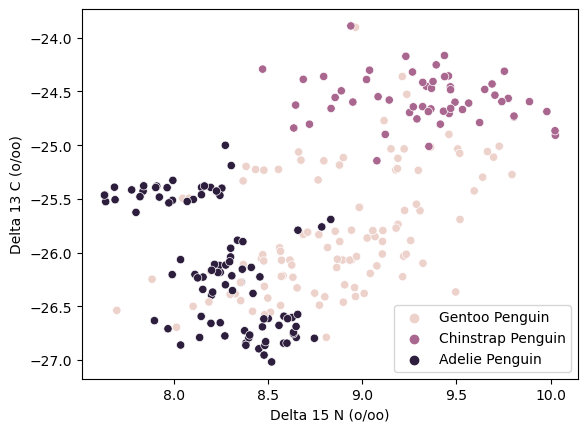

In [69]:
x = X_train['Delta 15 N (o/oo)']
y = X_train['Delta 13 C (o/oo)']

ax = sns.scatterplot(data=X_train, x = 'Delta 15 N (o/oo)', y = 'Delta 13 C (o/oo)', hue = y_train)

h,l = ax.get_legend_handles_labels()

l = ["Gentoo Penguin", "Chinstrap Penguin", "Adelie Penguin"]

ax.legend(h, l)
plt.show()


I threw a few new quantitative attributes on a graph to get an idea of how they compared. Once again, looking at the graph, I don't have super high hopes that these would be successful as classifiers. It does appear that (1) penguins have a higher Delta 13 C (o/oo) than other species. (0) penguins overlapped with (1) penguins heavily for Delta 15 N (o/oo). (0) penguins also overlap heavily for Delta 13 C (o/oo) with (2) penguins, leading to a prediction that classification would be difficult.

In [6]:
X_train.groupby(y_train)[['Island_Biscoe', 'Island_Dream', 'Island_Torgersen']].mean()

,Island_Biscoe,Island_Dream,Island_Torgersen
0,0.305556,0.37963,0.314815
1,0.000000,1.00000,0.000000
2,1.000000,0.00000,0.000000


Here, I felt like I hit the jackpot. It seems that (1) penguins were only found on Island_Dream, and (2) pengiuns were only found on Island_Biscoe. Although (0) penguins are spread equally among all three islands, this simplifies the problem significantly. However, it is still important to run some tests and be aware of any possible overfitting.

With a few interesting graphics, and a summary table, it's time to start modeling.

### Modeling

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

x_new = SelectKBest(mutual_info_classif, k = 3)
x_new.fit_transform(X_train, y_train)
x_new.get_feature_names_out()


array(['Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
      dtype=object)

In [72]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True).fit(X_train, y_train)
x_new = model.transform(X_train)
model.get_feature_names_out()

c:\Users\Zoe Greenwald\anaconda3\envs\ml-0451\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
      dtype=object)

After trying two methods of features selection and getting only quantitative features, I'm going to give the brute force method a shot.

In [9]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

qual_cols = ["Island", "Clutch Completion", "Stage_adult", "Sex"]
quant_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

best_score = 0.0
best_cols = []

for qual in qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(quant_cols, 2):
    cols = qual_cols + list(pair) 

    LR = LogisticRegression(solver='lbfgs', max_iter = 10000)
    LR.fit(X_train[cols], y_train)
    score = LR.score(X_train[cols], y_train)

    if score > best_score:
      best_score = score
      best_cols = cols

# puts the qualitative columns at the end 
best_cols = best_cols[::-1]

print(best_cols)
print(best_score)


['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island_Torgersen', 'Island_Dream', 'Island_Biscoe']
0.99609375


Success! I may have forced it by looking only at groups of 3 that included 1 qualitative column, but I've managed to reproducibly find the columns I want to use for my modelling. Culmen depth, culmen length, and island seem to have a high success rate for classifying the three penguin species.

In [10]:
cv_scores_LR = cross_val_score(LR, X_train[best_cols], y_train, cv=5).mean()
print(cv_scores_LR)


0.9883107088989442


In [11]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

depths = [*range(3, 20)]
cv_scores_dtc = []

for val in depths:
    dtc = DecisionTreeClassifier(criterion="gini", max_depth=val).fit(X_train[best_cols], y_train)
    cv_scores_dtc.append(cross_val_score(dtc, X_train[best_cols], y_train, cv=5).mean())

best_score = np.max(cv_scores_dtc)
best_depth = depths[np.argmax(cv_scores_dtc)]
print(best_score)
print(best_depth)


0.9765460030165913
7


In [12]:
from sklearn.ensemble import RandomForestClassifier

trees = [*range(10, 100)]
cv_scores_rf = []

for val in trees:
    rf = RandomForestClassifier(n_estimators = val).fit(X_train[best_cols], y_train)
    cv_scores_rf.append(cross_val_score(rf, X_train[best_cols], y_train, cv=5).mean())

best_score = np.max(cv_scores_rf)
best_depth = trees[np.argmax(cv_scores_rf)]
print(best_score)
print(best_depth)

0.9843891402714933
16


### Testing

Looking at the scores of the best fits of all the tested models, it looks like LR pulls ahead by just a fraction of a percent, so I'll go ahead and try that on the test data.

In [13]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

LR.fit(X_train[best_cols], y_train)
LR.score(X_test[best_cols], y_test)

1.0

We did it! With enough modeling and praying, we got 100% accuracy on the test data! Woohoo!!!

In [14]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "upper right", bbox_to_anchor = (2.5, 0.75))
      
      plt.tight_layout()

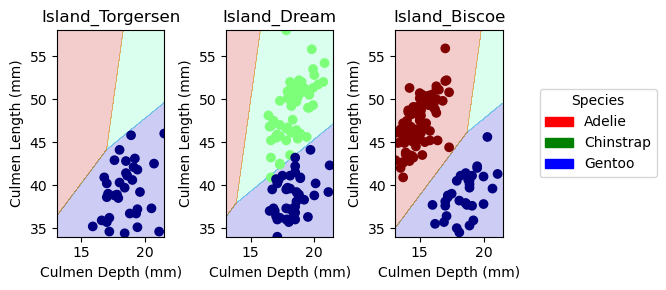

In [15]:
plot_regions(LR, X_train[best_cols], y_train)


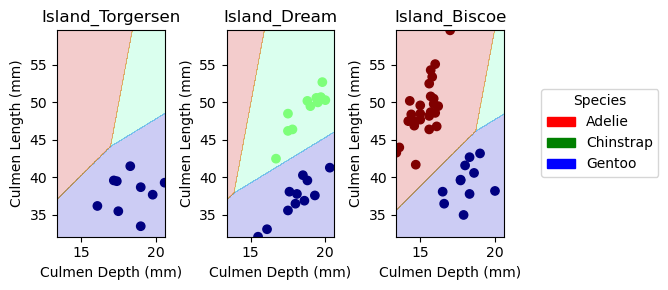

In [16]:
plot_regions(LR, X_test[best_cols], y_test)

To finish up, lets take a look at the confusion matrix to see what kind of mistakes our model made (even though our model didn't make any mistakes on the test data).

In [42]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test[best_cols])
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]], dtype=int64)

Given that our model had 100% accuracy on the test set, this was the confusion matrix I was expecting. The only non-zero numbers are along the diagonal, signifying that every penguin was correctly classified as its own species.

To close out this first blog post, I will first discuss my results, and then my learnings. I found that I was able to use machine learning on training data to prepare an group of features and model to successfully classify penguins into their respective species group. The optimal features ended up being culmen length, culmen depth, and what island the penguin was found on, and I determined the ideal model to be linear regression after using cross-validation on several different models before applying the algorithm to the test data. I was excited to meet Phil's request for 100% accuracy on the test data. Some further analysis was done to compare the decision regions and their boundaries between the train and test data sets. I learned a lot about pandas feature selections and models in this assignment, along with the basic flow of using machine learning in a data science project.